利用[Ames Housing dataset](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)預測房價

# Data Preprocessing
 1. Data Type Transformation 
 2. Imputation 
 3. Create / Discard Features 
 4. Normality 
 5. Outlier 

# Model Selection
1. Hyper Parameter Tunning
2. Ensemble

### TODO...
* [Features Important Analysis](https://www.kaggle.com/jimthompson/boruta-feature-importance-analysis)
* [Model Stacking](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/23409)
* Advanced Outlier Detection
* Hyper parameter Tunning

In [1]:
# -*- coding: utf-8 -*-

# pandas
import pandas as pd

# numpy, matplotlb, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy.stats as st

In [2]:
# Import Dataset
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## Baseline Model
A benchmark against to our feature engineering result

### Preprocess

In [3]:
def preScoreTest(x, y=None):
    x = pd.get_dummies(x)
    x = x.fillna(x.mean())
    y = pd.get_dummies(y)
    y = y.fillna(y.mean())
    common_cols = list(set(x.columns.tolist()) & set(y.columns.tolist()))
    y = y[common_cols]
    common_cols.append('SalePrice')
    x = x[common_cols]
    return x, y

In [4]:
train_base = train_df.copy()
test_base = test_df.copy()
train, test = preScoreTest(train_base, test_base)

### Modelling

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rfg = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1)
accuracies = cross_val_score(estimator = rfg, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.863228650848


In [6]:
rfg.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred = rfg.predict(test)

In [7]:
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_base', index=False)

## Data Type Transformation

In [8]:
# Numeric to Categoric
train_df['MSSubClass'] = train_df['MSSubClass'].astype('object')
test_df['MSSubClass'] = test_df['MSSubClass'].astype('object')

In [9]:
# Rank Fields to Numeric 
train_df.BsmtCond = train_df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.BsmtExposure = train_df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
train_df.BsmtFinType1 = train_df.BsmtFinType1.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train_df.BsmtFinType2 = train_df.BsmtFinType2.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train_df.BsmtQual = train_df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.ExterCond = train_df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.ExterQual = train_df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.FireplaceQu = train_df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.GarageCond = train_df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.GarageQual = train_df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.HeatingQC = train_df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.KitchenQual = train_df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df.PoolQC = train_df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [10]:
test_df.BsmtCond = test_df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.BsmtExposure = test_df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
test_df.BsmtFinType1 = test_df.BsmtFinType1.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test_df.BsmtFinType2 = test_df.BsmtFinType2.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test_df.BsmtQual = test_df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.ExterCond = test_df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.ExterQual = test_df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.FireplaceQu = test_df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.GarageCond = test_df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.GarageQual = test_df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.HeatingQC = test_df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.KitchenQual = test_df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test_df.PoolQC = test_df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [11]:
train, test = preScoreTest(train_df, test_df)

rfg = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1)
accuracies = cross_val_score(estimator = rfg, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.865806194248


## Imputation

In [12]:
def missing_data(df):
    missing = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
    return missing_data
missing = missing_data(train_df)
print(missing.head(25))

              Missing   Percent
PoolQC           1453  0.995205
MiscFeature      1406  0.963014
Alley            1369  0.937671
Fence            1179  0.807534
FireplaceQu       690  0.472603
LotFrontage       259  0.177397
GarageCond         81  0.055479
GarageType         81  0.055479
GarageYrBlt        81  0.055479
GarageFinish       81  0.055479
GarageQual         81  0.055479
BsmtExposure       38  0.026027
BsmtFinType2       38  0.026027
BsmtFinType1       37  0.025342
BsmtCond           37  0.025342
BsmtQual           37  0.025342
MasVnrArea          8  0.005479
MasVnrType          8  0.005479
Electrical          1  0.000685
Utilities           0  0.000000
YearRemodAdd        0  0.000000
MSSubClass          0  0.000000
Foundation          0  0.000000
ExterCond           0  0.000000
ExterQual           0  0.000000


* PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageX, BsmtX都是由於沒有(no Pool ,Miss Feature, Alley ...)，而非真的遺失因此填上"None"值。
* 利用其他欄位預測LotFrontage的遺失值
* 其餘遺失值都很低，因此帶入最常見的數值



In [170]:
train_m = train_df.copy()

In [60]:
train_m['PoolQC'].fillna('None', inplace=True)
train_m['MiscFeature'].fillna('None', inplace=True)
train_m['Alley'].fillna('None', inplace=True)
train_m['Fence'].fillna('None', inplace=True)
train_m['FireplaceQu'].fillna('None', inplace=True)

# GarageX
train_m['GarageFinish'].fillna('No', inplace=True)
train_m['GarageType'].fillna('No', inplace=True)
train_m['GarageCond'].fillna('No', inplace=True)
train_m['GarageQual'].fillna('No', inplace=True)

# BsmtX
train_m['BsmtFinType2'].fillna('No', inplace=True)
train_m['BsmtExposure'].fillna('No', inplace=True)
train_m['BsmtFinType1'].fillna('No', inplace=True)
train_m['BsmtQual'].fillna('No', inplace=True)
train_m['BsmtCond'].fillna('No', inplace=True)
# MassVnrX
train_m['MasVnrArea'].fillna('No', inplace=True)
train_m['MasVnrType'].fillna('No', inplace=True)

train_m['Electrical'].fillna('SBrkr', inplace=True)

In [61]:
# LotFrontage
# Using xgboost to impute missing data
from xgboost import XGBRegressor

null_idx = train_m.loc[train_m['LotFrontage'].isnull()].index

train_lot = train_m.copy()
test_lot = train_m.copy()
train_lot = train_lot.drop(train_lot.index[[null_idx]])
test_lot = test_lot.loc[null_idx]

x, y = preScoreTest(train_lot, test_lot)

xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
xgb.fit(x.drop(['LotFrontage', 'SalePrice'], axis=1),x['LotFrontage'])
y = y.drop(['LotFrontage', 'SalePrice'], axis=1)
y_pred = xgb.predict(y)
train_m.loc[null_idx, 'LotFrontage'] = y_pred


In [62]:
missing = missing_data(train_m)
print(missing.head(5))

             Missing   Percent
GarageYrBlt       81  0.055479
SalePrice          0  0.000000
RoofStyle          0  0.000000
RoofMatl           0  0.000000
Exterior1st        0  0.000000


In [ ]:
train, test = preScoreTest(train_m, test_df)

rfg = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1)
accuracies = cross_val_score(estimator = rfg, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

In [171]:
train, test = preScoreTest(train_m, test_df)

In [172]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.9013048695


In [29]:
xgb.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred = xgb.predict(test)
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_missing2', index=False)

## Create / Discard Features

In [258]:
train_f = train_m.copy()
test_f = test_df.copy()

In [259]:
# too much duplicate value in single columns(over 90%)
val = [n for n in train_f.columns if train_f[n].value_counts().max()/len(train_f) > 0.97]
print(val)
train_f = train_f.drop(val, axis=1)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', '3SsnPorch', 'PoolArea']


In [260]:
# Number of Baths
train_f['Bath'] = train_f['FullBath'] + 0.5 * train_f['HalfBath'] + train_f['BsmtFullBath'] + 0.5 * train_f['BsmtHalfBath']
train_f = train_f.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

test_f['Bath'] = test_f['FullBath'] + 0.5 * test_f['HalfBath'] + test_f['BsmtFullBath'] + 0.5 * test_f['BsmtHalfBath']
test_f = test_f.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

In [261]:
# drop Id
train_f = train_f.drop('Id', axis=1)
test_f = test_f.drop('Id', axis=1)

In [262]:
train, test = preScoreTest(train_f, test_f)

In [263]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.903854295269


In [225]:
xgb.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred =xgb.predict(test)
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_features', index=False)

## Normality
Lots of statistic test(z, t, chi2, f...) has normal distribution asuumption.

In [264]:
train_normal = train_f.copy()
test_normal = test_f.copy()

In [266]:
# skewness
numeric_cols = [f for f in train_normal if train_normal.dtypes[f] != 'object']
train_normal[numeric_cols].skew()

LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
ExterQual         0.825988
ExterCond         1.397219
BsmtQual          0.286003
BsmtCond          0.000700
BsmtExposure      1.174906
BsmtFinType1     -0.177260
BsmtFinSF1        1.685503
BsmtFinType2      3.489000
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
HeatingQC        -0.540458
1stFlrSF          1.376757
2ndFlrSF          0.813030
GrLivArea         1.366560
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
KitchenQual       0.386765
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
FireplaceQu      -0.902508
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
GarageQual       -1.309356
GarageCond       -3.161554
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
ScreenPorch       4.122214
P

In [268]:
skew =train_normal[numeric_cols].columns[train_normal[numeric_cols].skew() >1]
skew

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

In [269]:
for s in skew.values:
    if s in test_normal.columns:
        train_normal[s] = np.log1p(train_normal[s])
        test_normal[s] = np.log1p(test_normal[s])
    else:
        print(s)

SalePrice


In [270]:
train_normal['SalePrice'] = np.log1p(train_normal['SalePrice'])

In [271]:
train, test = preScoreTest(train_normal, test_normal)

In [272]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.915197935091


In [234]:
xgb.fit(train.drop('SalePrice', axis=1), y=train['SalePrice'])
y_pred = np.expm1(xgb.predict(test))
submission = pd.DataFrame({
    'Id':test_df['Id'],
    'SalePrice':y_pred
})
submission.to_csv('sub_normality', index=False)

## Outlier

In [273]:
train_out = train_normal.copy()
test_out = test_normal.copy()

In [274]:
train, test = preScoreTest(train_out, test_out)

In [237]:
import statsmodels.api as sm
regressor = sm.OLS(train['SalePrice'], train.drop('SalePrice', axis=1)).fit()
result = regressor.outlier_test()

/home/lafes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/lafes/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/lafes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/home/lafes/anaconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:251

In [275]:
outlier = result['bonf(p)']
outlier = outlier[outlier<1e-3].index

In [276]:
train_out = train_out.drop(train_out.index[[outlier]])

In [277]:
train, test = preScoreTest(train_out, test_out)

In [278]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.926510794827


## Feature Selection

In [279]:
train, test = preScoreTest(train_out, test_out)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
rfg = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1)
rfg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [281]:
X = train.drop('SalePrice', axis=1)
imp = pd.DataFrame(rfg.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)
imp

,Importance
OverallQual,5.516378e-01
GrLivArea,9.169370e-02
Bath,4.467294e-02
TotalBsmtSF,4.240544e-02
GarageCars,3.309667e-02
GarageArea,3.121596e-02
1stFlrSF,2.537222e-02
BsmtFinSF1,1.679240e-02
LotArea,1.234682e-02
YearBuilt,1.077533e-02


In [359]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)

X_tr, X_cv, y_tr, y_cv = train_test_split(X, y, test_size=0.3, random_state = 99)

rms_cv = []
best_rmse = 100
target_features = ()

for i in range(10, len(imp)):
    keep = imp.iloc[0:i].index.values
    X_tr_tmp = X_tr[keep]
    X_cv_tmp = X_cv[keep]
    
    xgb.fit(X_tr_tmp, y_tr)
    y_pred = xgb.predict(X_cv_tmp)
    
    rms = mean_squared_error(y_cv, y_pred)**0.5
    rms_cv += [rms]
    if rms < best_rmse:
        target_features = (i, rms)
        best_rmse = rms


Global minimum error is 0.11561834537021001 when 70 features be Selected


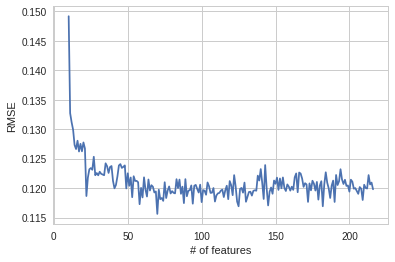

In [374]:
plt.plot(range(10, len(imp)), rms_cv)
plt.xlabel('# of features')
plt.ylabel('RMSE')
print('Global minimum error is {} when {} features be Selected'.format(target_features[1], target_features[0]))

In [382]:
selected = imp.iloc[0:140].index.values

In [383]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = X[selected], y = y, cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())

CV score is: 0.925296691709


## Ensemble!

In [384]:
train, test = preScoreTest(train_out, test_out)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [ ]:
def Ensemble(estimator):
    result = {}
    for est in estimator:
        accuracies = cross_val_score(estimator = xgb, X = X, y = y, cv = 10, n_jobs=-1)
        est.fit(X, y)
        y_pred = np.expm1(est.predict(test))
        name = est.__class__.__name__
        

In [385]:
xgb = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
accuracies = cross_val_score(estimator = xgb, X = train.drop('SalePrice', axis=1), y = train['SalePrice'], cv = 10, n_jobs=-1)
print('CV score is:', accuracies.mean())
xgb.fit(train.drop(X, y)
y_pred_xgb = np.expm1(xgb.predict(test))

CV score is: 0.926510794827


In [394]:
xgb.__class__.__name__

'XGBRegressor'

In [386]:
y_pred_xgb

array([ 125760.28125  ,  170265.515625 ,  192845.375    , ...,
        166465.0625   ,  125658.8515625,  233030.671875 ], dtype=float32)

In [387]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=10)
accuracies = cross_val_score(estimator = reg, X = X, y = y, cv = 5, n_jobs=-1)
print('CV score is:', accuracies.mean())
reg.fit(X, y)
y_pred_reg = reg.predict(test)

CV score is: 0.924726636148


array([ 11.73862733,  11.93195043,  12.10656009, ...,  12.00996545,
        11.72620727,  12.35861444])